In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import numpy as np
  
raw_data_path = '../data/raw'
file_list = glob.glob(raw_data_path + "/*.csv") 

In [2]:
file_list

['../data/raw\\1_2025-05-05_20-09.csv', '../data/raw\\2_2025-05-05_20-08.csv']

In [6]:
main_dataframe = pd.read_csv(file_list[0])
for i in range(1, len(file_list)): 
    data = pd.read_csv(file_list[i]) 
    df = pd.DataFrame(data) 
    main_dataframe = pd.concat([main_dataframe, df], axis=0) 

In [7]:
main_dataframe


,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_month,commissions,price,district,street,house_number,underground,residential_complex
0,ID 12891703,homeowner,https://www.cian.ru/sale/flat/315747133/,Москва,sale,flat,10,18,1,32.0,-1,0,13590000,Останкинский,Березовая аллея,19к1,Ботанический сад,Апарт-комплекс Легендарный квартал
1,V I B E,real_estate_agent,https://www.cian.ru/sale/flat/314702076/,Москва,sale,flat,2,18,1,41.0,-1,0,22600000,Беговой,Ленинградский проспект,29к3,Динамо,Царская площадь
2,Mr.Flip,real_estate_agent,https://www.cian.ru/sale/flat/316766731/,Москва,sale,flat,9,16,1,40.8,-1,0,11400000,Бутырский,Яблочкова,25К3,Тимирязевская,NaN
3,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/315253252/,Москва,sale,flat,71,79,1,79.0,-1,0,75000000,Пресненский,1-й Красногвардейский проезд,22с2,Москва-Сити,NEVA TOWERS
4,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/313640113/,Москва,sale,flat,6,41,1,40.1,-1,0,35500000,Хорошевский,Ленинградский проспект,37/5,Аэропорт,Прайм Парк
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Самолет Плюс,real_estate_agent,https://www.cian.ru/sale/flat/316677255/,Москва,sale,flat,2,5,2,62.9,-1,0,15600000,Тимирязевский,Линейный проезд,6,Петровско-Разумовская,NaN
276,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/317138954/,Москва,sale,flat,9,37,2,45.0,-1,0,24700000,Останкинский,Годовикова,11к2,Алексеевская,iLove
277,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/317140581/,Москва,sale,flat,10,33,2,44.3,-1,0,28200000,Хорошево-Мневники,Причальный проезд,10к1,Шелепиха,Level Причальный
278,OPN PARTNER,real_estate_agent,https://www.cian.ru/sale/flat/316820546/,Москва,sale,flat,8,9,2,52.0,-1,0,14890000,Текстильщики,Юных Ленинцев,18К2,Волжская,NaN


In [8]:
main_dataframe['url_id'] = main_dataframe['url'].map(lambda x: x.split('/')[-2])
new_dataframe = main_dataframe[['url_id', 'total_meters', 'price']].set_index('url_id')

<Axes: >

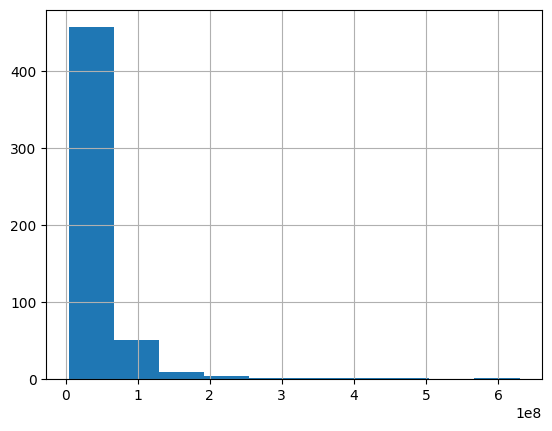

In [9]:
new_dataframe['price'].hist()

In [12]:
new_df = new_dataframe[new_dataframe['price'] < 100_000_000]
new_df = new_df[new_df['total_meters'] < 100]

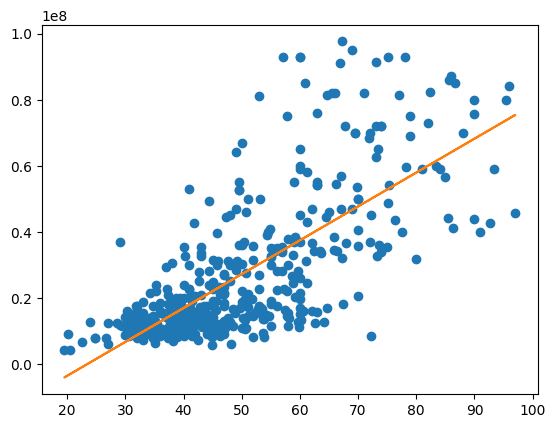

In [13]:
x = new_df['total_meters']
y = new_df['price']

plt.plot(x, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, y, 1)

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)

In [15]:
new_df.to_csv('../data/processed/train.csv', index=False)